In [111]:
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from sklearn.model_selection import train_test_split

Use `load_boston` to load the Boston Housing Dataset.
You must create a Linear Regression model fitted to this data to predict house prices.

- Check the data for nulls
- Explore the data, distributions, correlations.
- Take that into mind when choosing the features for your model.
- Watch out for colinearity.
- Split your data into train and test. [Check out how!](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- Measure the goodness of your fit! $R^2$, $RMSE$, etc.
- Try to make it better.
- Do your own research. Checkout both sklearn and statsmodels, get a feel of both.
- Have fun.


### Further resources

- [The internet is your friend](https://towardsdatascience.com/simple-and-multiple-linear-regression-with-python-c9ab422ec29c)
- [Scikit-Learn](https://scikit-learn.org)
- [Statsmodels](https://statsmodels.org)

In [77]:
X,y = load_boston(return_X_y=True)

In [78]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [79]:
X.columns = load_boston()["feature_names"]

In [80]:
print(load_boston()["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [81]:
#Exploramos nuetro set de datos
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [82]:
#Exploramos si hay datos nulos
X.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
dtype: bool

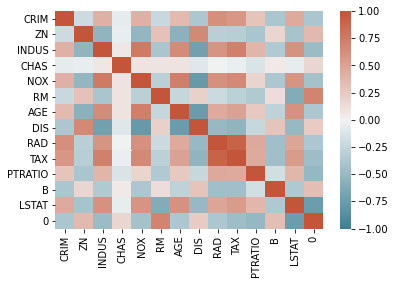

In [83]:
#Comprobamos en un heatmap divergente las posibles correlaciones que puedan existir
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(pd.concat([X,y],axis=1).corr(), cmap=cmap, vmin= -1, vmax=1);


In [84]:
#Comprobamos las correlaciones con nuestra variable objetivo (el precio de la vivienda)
pd.concat([X,y],axis=1).corr().iloc[-1]

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
0          1.000000
Name: 0, dtype: float64

In [85]:
#Nos quedamos con las tres variables que tienen una correlación con la variable objetivo superior a 0.5
variables = pd.concat([X,y],axis=1).columns[pd.concat([X,y],axis=1).corr().iloc[-1].abs() > 0.5].values

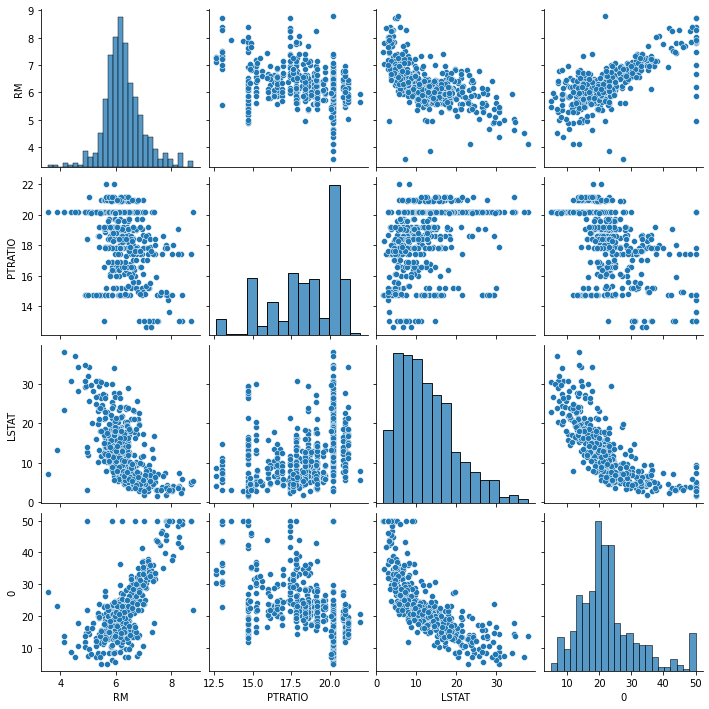

In [86]:
sns.pairplot(pd.concat([X,y],axis=1)[variables])

In [87]:
#Transformamos LSTAT a la inversa(1/LSTAT)
X['LSTATINV'] = 1/X['LSTAT']

In [88]:
variables[-2] ="LSTATINV"

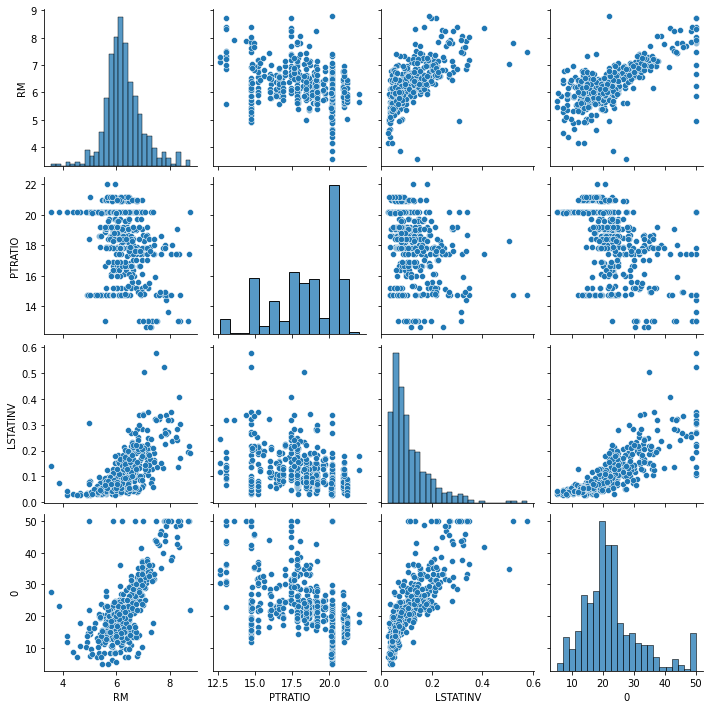

In [90]:
sns.pairplot(pd.concat([X,y],axis=1)[variables]);

In [112]:
split = train_test_split(X[variables], y)

In [114]:
X_train, X_test, y_train, y_test = split

In [115]:
X_train.shape

(379, 3)

In [116]:
X_test.shape

(127, 3)

In [96]:
lr = LinearRegression(fit_intercept=True)

In [107]:
variables[:-1]

array(['RM', 'PTRATIO', 'LSTATINV'], dtype=object)

In [108]:
variables = variables[:-1]

In [117]:
lr.fit(X_train[variables], y_train)

LinearRegression()

In [118]:
lr.coef_

array([[ 4.01709943, -1.00810897, 57.36390403]])

In [120]:
y_predict = lr.predict(X_test)

In [124]:
mse = mean_squared_error(y_test, y_predict)
rmse = mse**0.5
print(f" El MSE es igual a {mse} y el RMSE a {rmse}")

 El MSE es igual a 27.523858754974313 y el RMSE a 5.246318590685693


In [125]:
y_test.mean()

0    21.813386
dtype: float64

In [155]:
#Según la R2 la bondad del ajuste no es demasiado alta

r2 = r2_score(y_test, y_predict)
r2

0.6373535435601279

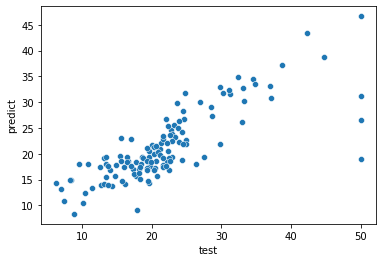

In [154]:
#Comparamos nuestra y_test con la y_predict para ver la eficacia del ajuste. Un ajuste perfecto supondría una recta diagonal. El modelo ajustado funciona bastante bien pero vemos algunos puntos que se salen de nuestra predicción al final del todo. 

 compare = y_test.copy()
 compare['predict'] = y_predict[:,0]
 compare.rename(columns = {0: "test"}, inplace = True)
 sns.scatterplot(x = "test", y = "predict", data = compare);